In [27]:
import numpy as np
import pydicom as dicom
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import cv2

In [28]:
def AddImage(path):
  ds = dicom.dcmread(path)
  pixels = np.array(ds.pixel_array)
  pixels = pixels / np.max(np.abs(pixels))

  return pixels

In [29]:
def AddImageToArray(x,folderPath):
  for filename in os.listdir(folderPath):
    f = os.path.join(folderPath, filename)
    if os.path.isfile(f):
      x.append(AddImage(os.path.join(folderPath, filename)))
    else:
      AddImageToArray(x,f)

In [30]:
x = []

AddImageToArray(x,'DICOM\PA1\ST1\SE2')

x = np.array(x)

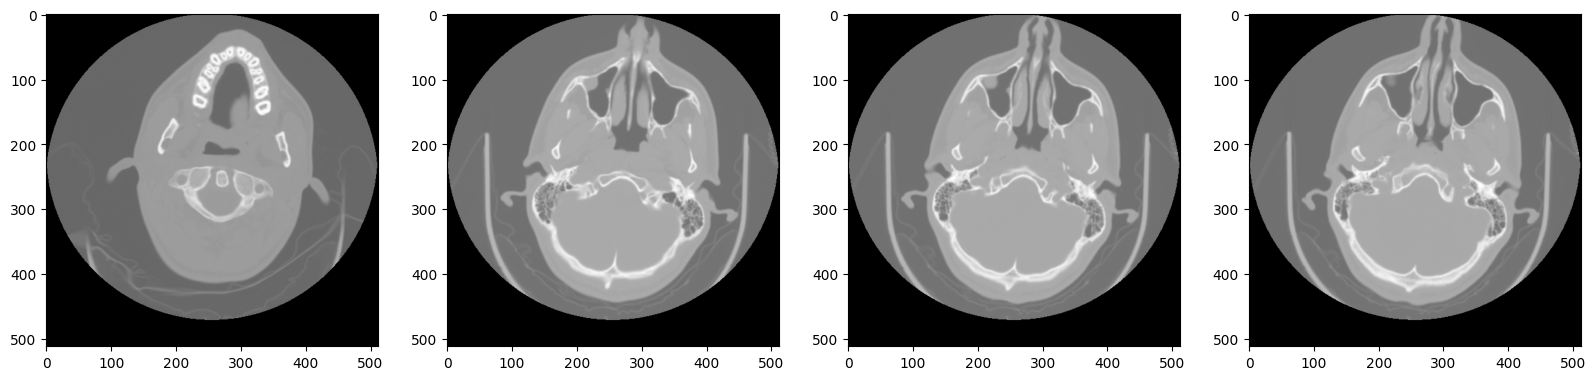

In [31]:
k = 0
plt.figure(figsize=(25,25))
for i in range(4):
  plt.subplot(5,5, i+1)
  plt.imshow(x[k], cmap='gray')
  k+=1

plt.show()

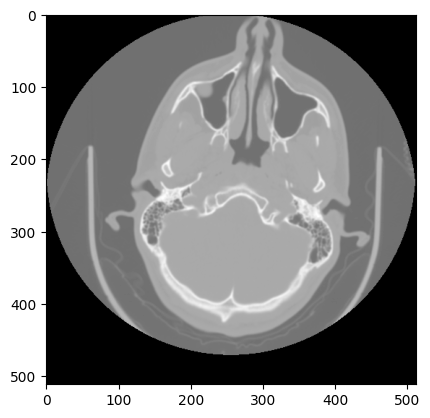

In [32]:
plt.imshow(x[2], cmap='gray')
  
plt.show()

In [33]:
print(x[2].shape)

(512, 512)


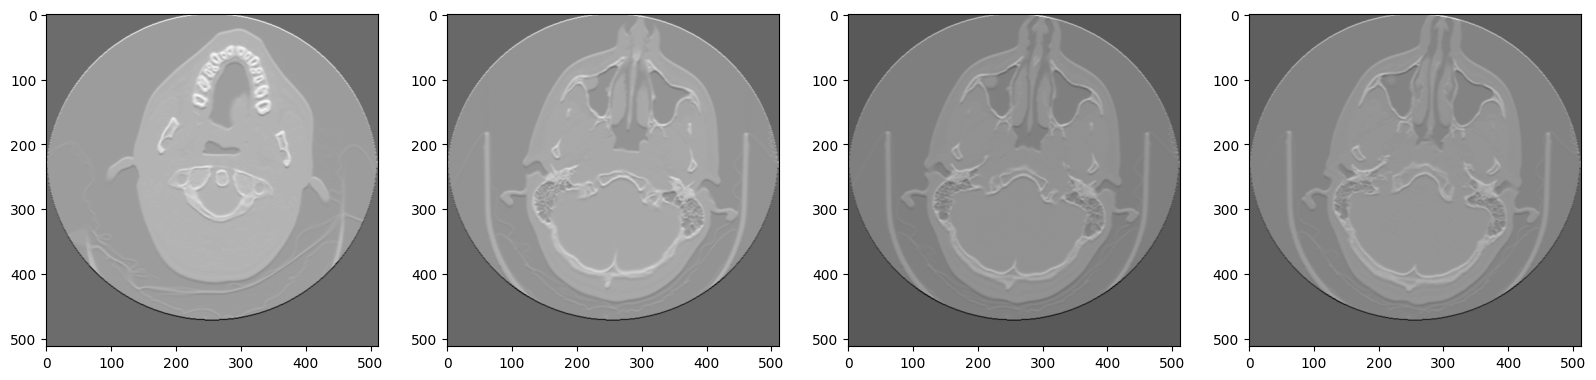

In [34]:
plt.figure(figsize=(25,25))
kernel_border_x = np.array([[-1,-2,-1], [1,0,1], [1,2,1]])
for i in range(0,4):
    plt.subplot(5,5, i+1)
    img_border_x = cv2.filter2D(x[i], -1, kernel_border_x)
    plt.imshow(img_border_x, cmap='gray')
    

0.4


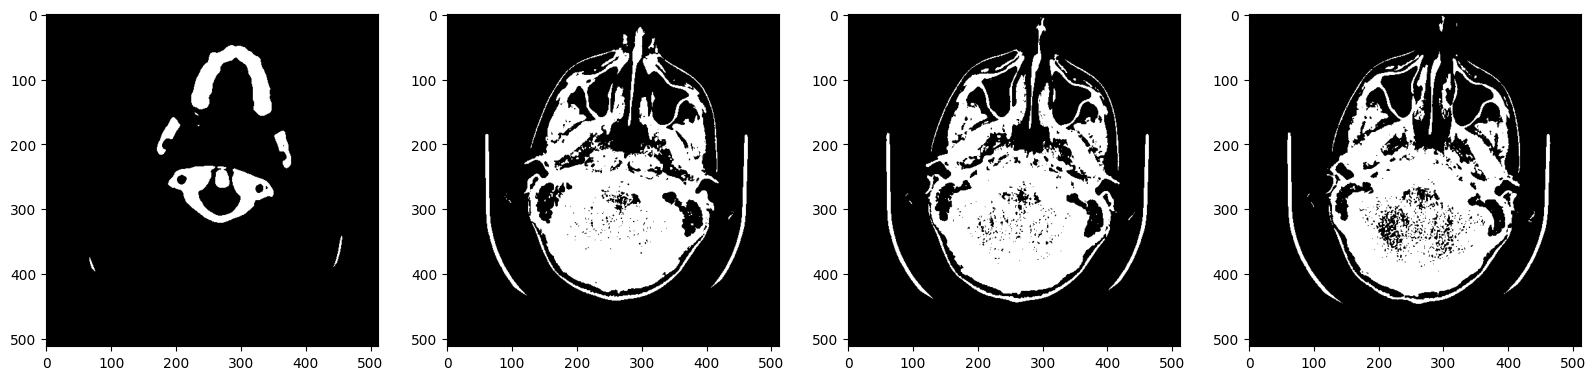

0.41000000000000003


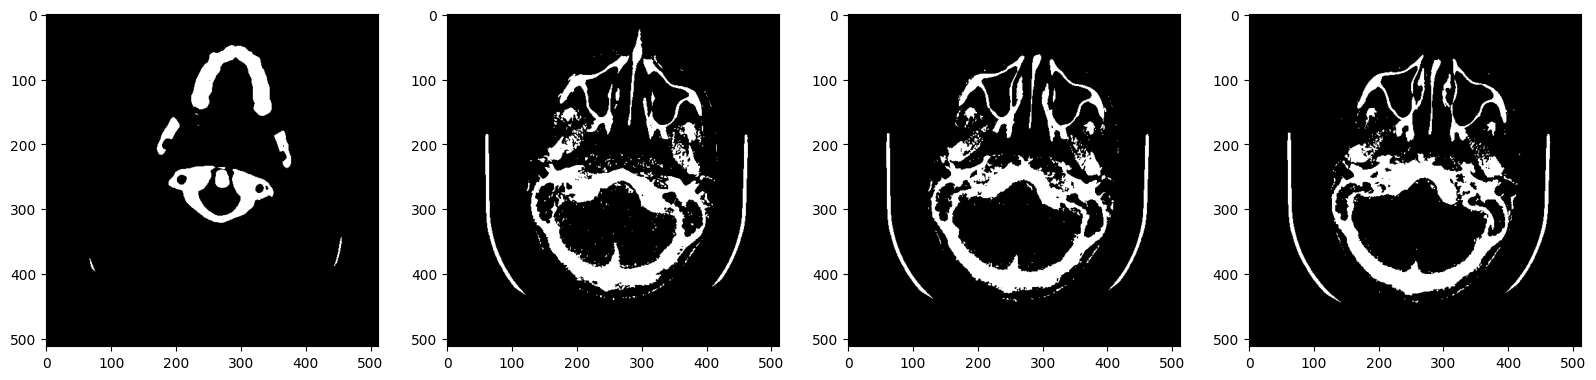

0.42000000000000004


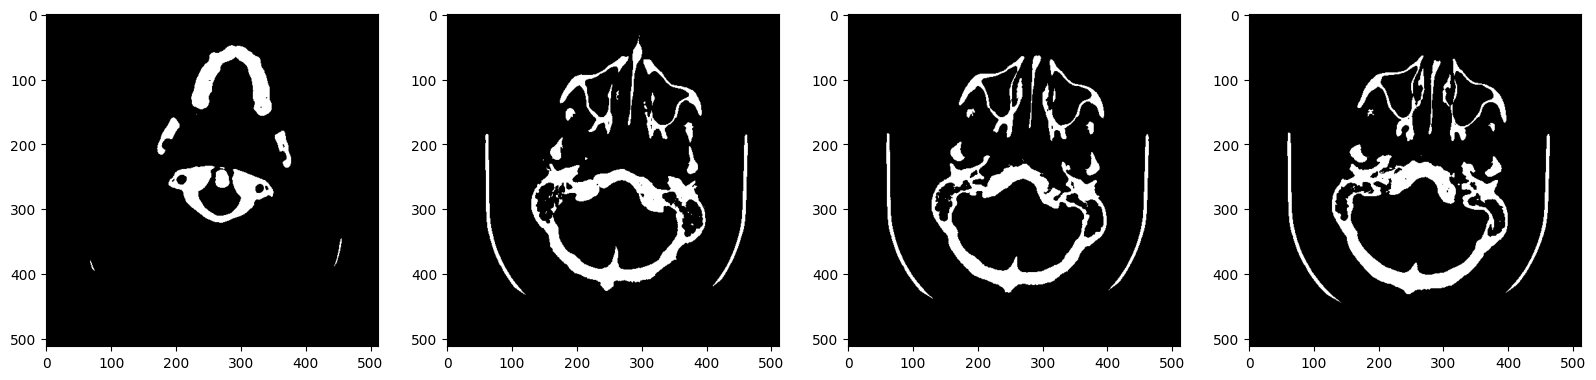

0.43000000000000005


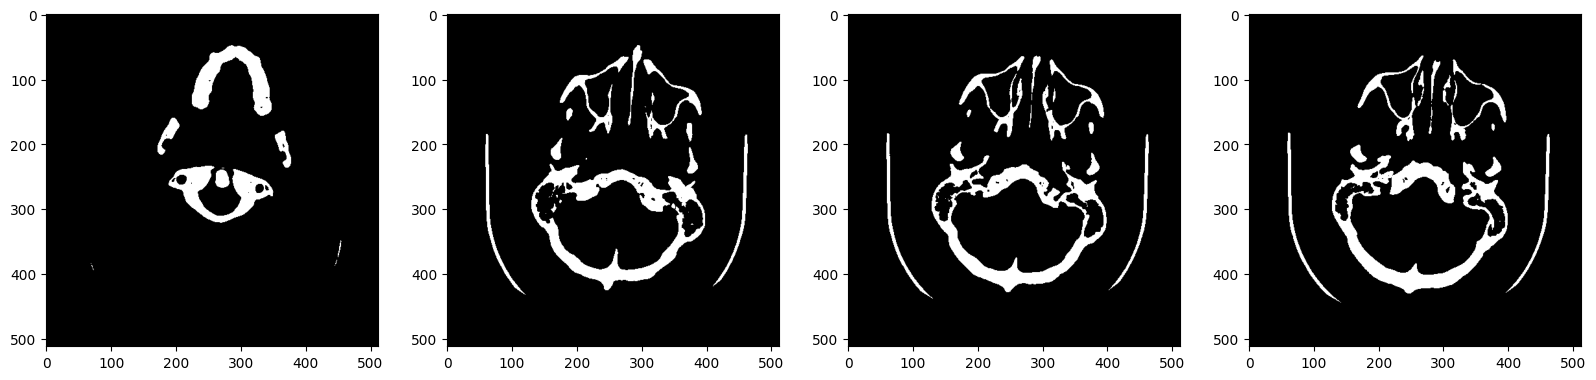

0.44000000000000006


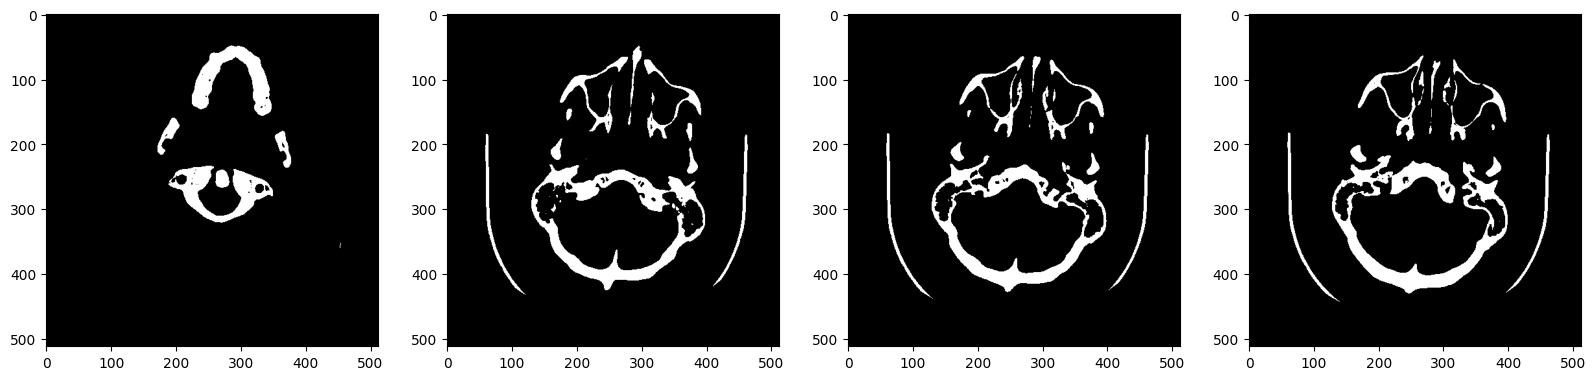

0.45000000000000007


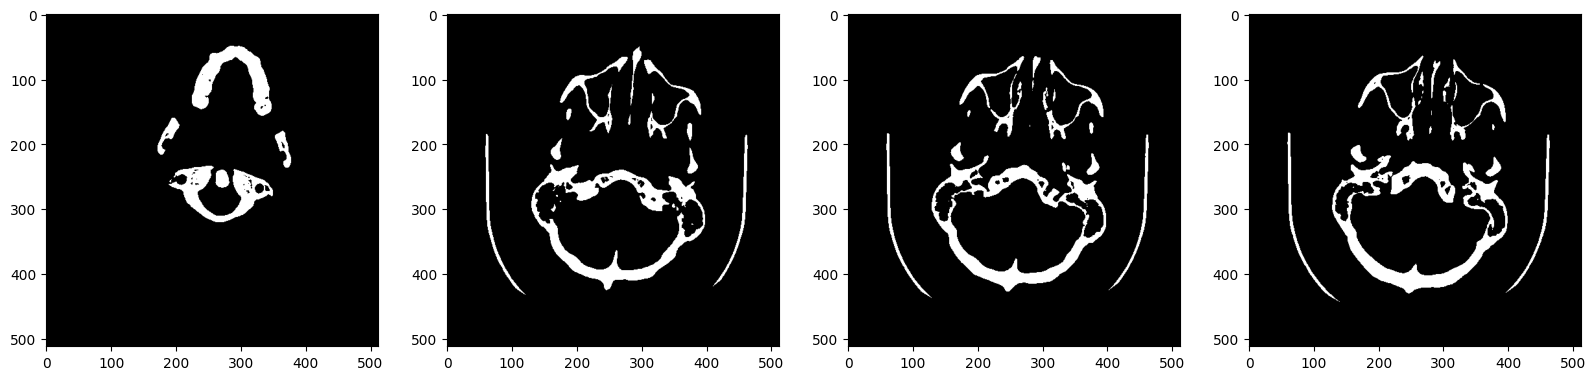

In [58]:
rate = np.arange(0.4, 0.46, 0.01)
for k in rate:
    print(k)
    plt.figure(figsize=(25,25))
    for i in range(0,4):
        plt.subplot(5,5, i+1)
        img_border_x = np.where(x[i] < k, 0, 1)
        plt.imshow(img_border_x, cmap='gray')
    plt.show()

In [64]:
rate = 0.43
scools = np.array([np.where(t < rate, 0, 1) for t in x])

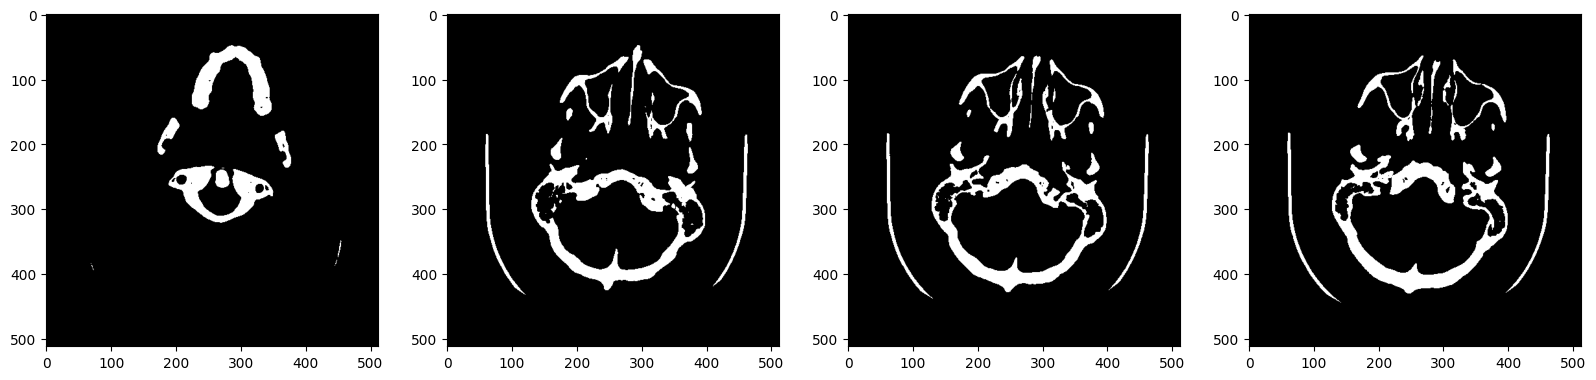

In [60]:
k = 0
plt.figure(figsize=(25,25))
for i in range(4):
  plt.subplot(5,5, i+1)
  plt.imshow(scools[k], cmap='gray')
  k+=1

plt.show()

In [95]:
vertex = []
for k in range(len(scools)):
    test = scools[k]
    for i in range(len(test)):
        for j in range(len(test[i])):
            if test[i,j] > 0:
                vertex.append([i,j, k])

In [96]:
vertex = np.array(vertex)

In [110]:
vertex_f = vertex[:50000]

In [106]:
#import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d


def plot_verticles(vertices, isosurf = False, filename = None):
    # Create a new plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = [v[0] for v in vertices]
    y = [v[1] for v in vertices]
    z = [v[2] for v in vertices]    
    if isosurf:
        ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)
    else:
        ax.scatter(x, y, z, c='r', marker='o')    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    # Show or save the plot
    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)


def plot_mesh(
    your_mesh, 
    size_x=10, 
    size_y=10, 
    dpi=80, 
    filename = None
    ):
    # Create a new plot
    figure = plt.figure(figsize=(size_x, size_y), dpi=dpi)
    #axes = mplot3d.Axes3D(figure, auto_add_to_figure=False)
    axes = mplot3d.Axes3D(figure)
    axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors, edgecolor="black"))
    figure.add_axes(axes)
    # Auto scale to the mesh size
    scale = your_mesh.points.flatten()
    axes.auto_scale_xyz(scale, scale, scale)
    # Show or save the plot
    if filename is None:
        plt.show()
    else:
        #matplotlib.use('Agg')
        plt.savefig(filename)

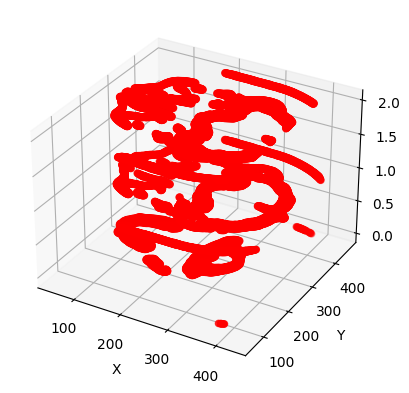

In [113]:
plot_verticles(vertex_f, False, 'test')